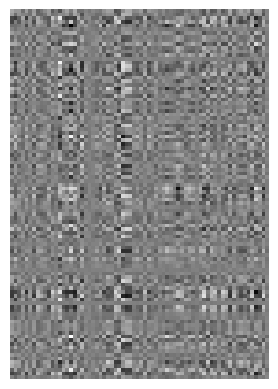

In [1]:
from utils.data_generation import create_rank_k_dataset
from matplotlib import pyplot as plt
import numpy as np

M, M_incomplete, omega, mask_array= create_rank_k_dataset(n_rows=100, n_cols=70, k=3, gaussian=True)
plt.axis('off')
plt.imshow(M, cmap='gray')

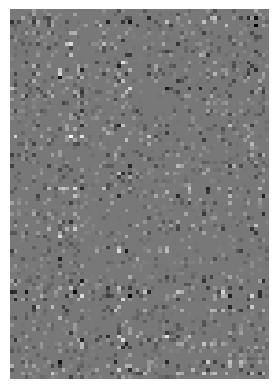

In [2]:
plt.axis('off')
plt.imshow(M_incomplete, cmap='gray')
missing_mask = ~mask_array.astype(bool)

In [3]:
%%time
from src.css_matrix_completion.transform import cx, ls
from src.css_matrix_completion.cssmc import CSSMC
from src.css_matrix_completion.css import uniform

#TODO svt
# proste przyrostowe
solver = CSSMC(col_number=35, transform=ls, col_select=uniform, fill_method='zero')
M_filled, cols_idx = solver.fit_transform(M_incomplete)
print(f"rmse {np.linalg.norm(M_filled - M)/np.linalg.norm(M)}")
print(f"rmse_omega {np.linalg.norm(M_filled[missing_mask]- M[missing_mask])/np.linalg.norm(M[missing_mask])}")
print(f"mae_omega {np.mean(np.abs(M_filled[missing_mask]- M[missing_mask]))}")

rmse 0.8199559973549495
rmse_omega 0.9514184630505091
mae_omega 1.2676200122764534
CPU times: user 2.46 s, sys: 481 ms, total: 2.94 s
Wall time: 2.45 s


In [5]:
print(f"rmse {np.linalg.norm(M_filled - M)/np.linalg.norm(M)}")
print(f"rmse_omega {np.linalg.norm(M_filled[missing_mask]- M[missing_mask])/np.linalg.norm(M[missing_mask])}")
print(f"mae_omega {np.mean(np.abs(M_filled[missing_mask]- M[missing_mask]))}")

NameError: name 'M_filled' is not defined

In [5]:
print(f"rmse {np.linalg.norm(M_filled[:, cols_idx] - M[:, cols_idx])/np.linalg.norm(M[:, cols_idx])}")

rmse 0.8866397921095345


In [6]:
from fancyimpute import NuclearNormMinimization
missing_mask = ~mask_array.astype(bool)
M_incomplete[missing_mask] = np.nan
solver = NuclearNormMinimization()
M_filled = solver.fit_transform(M_incomplete)
print(f"rmse {np.linalg.norm(M_filled - M)/np.linalg.norm(M)}")
print(f"rmse_omega {np.linalg.norm(M_filled[missing_mask]- M[missing_mask])/np.linalg.norm(M[missing_mask])}")
print(f"mae_omega {np.mean(np.abs(M_filled[missing_mask]- M[missing_mask]))}")

                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Oct 06 08:44:49 PM: Your problem has 7000 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 06 08:44:49 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 06 08:44:49 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 06 08:44:49 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 06 08:44:49 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Oct 06 08:44:49 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

KeyboardInterrupt: 

In [4]:
M, M_incomplete, omega, mask_array= create_rank_k_dataset(n_rows=100, n_cols=70, k=5, gaussian=True)
cols = uniform(M, 30)
#ok_mask = np.array(~np.isnan(M))
ok_mask = mask_array
C = np.copy(M[:, cols])
ok_mask[:, cols] = True
X = cx(np.array(M), ok_mask.astype(bool), np.array(C))

In [5]:
np.linalg.norm(X-M)/np.linalg.norm(M)

1.7015808663501175e-15

In [6]:
cols_idx

array([ 3,  7, 33, 50, 20, 27, 28, 38, 51,  2, 48, 55, 53, 69, 16, 42, 30,
       41, 67, 40, 45, 23, 66, 61, 59, 24,  9,  5, 64, 37, 22, 19, 47, 65,
        4])